<a href="https://colab.research.google.com/github/Pobudi/Python-Portfolio/blob/master/Kopia_notatnika_Space_Missions_Analysis_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [ ]:
%pip install iso3166

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 21.2 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


### Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
import iso3166
from datetime import datetime, timedelta

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [ ]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
# (columns, rows)
df_data.shape
df_data.columns

Index(['Organisation', 'Location', 'Date', 'RocketStatus', 'Price',
       'MissionStatus'],
      dtype='object')

In [ ]:
# Deleted unnecessary? columns
#df_data.drop(columns=["Unnamed: 0", 'Unnamed: 0.1'], inplace=True)
df_data.Location.isna().values.any()

False

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [ ]:
df_data.isna().values.any()
df_data["Price"] = df_data["Price"].str.replace(",", "")
df_data = df_data.astype({"Price": "float"})

In [ ]:
for i, value in enumerate(df_data.duplicated().values):
    if value == True:
        print(f"{df_data.loc[i]}\n")



Organisation                                       Virgin Galactic
Location         VMS Eve, Mojave Air and Space Port, California...
Date                                                           NaN
RocketStatus                                                Active
Price                                                          NaN
MissionStatus                                              Success
Name: 482, dtype: object

Organisation                                       Virgin Galactic
Location         VMS Eve, Mojave Air and Space Port, California...
Date                                                           NaN
RocketStatus                                                Active
Price                                                          NaN
MissionStatus                                              Success
Name: 527, dtype: object

Organisation                                       Virgin Galactic
Location         VMS Eve, Mojave Air and Space Port, California...
Date      

## Descriptive Statistics

In [ ]:
# Price stats
df_data["Price"].describe()

count   2,354.00
mean       79.48
std       157.40
min         2.50
25%        20.00
50%        29.75
75%        65.00
max     3,000.00
Name: Price, dtype: float64

In [ ]:
# how many launches per organisation
launches_comp = df_data.groupby("Organisation", as_index=False).count().sort_values("Location", ascending=False)
launches_comp = pd.DataFrame({"Organisation": launches_comp.Organisation, "Launches": launches_comp.Location})
launches_comp

,Organisation,Launches
42,RVSN USSR,2477
52,US Air Force,548
8,CASC,440
44,Roscosmos,347
55,VKS RF,326
3,Arianespace,291
20,General Dynamics,251
37,NASA,221
49,SpaceX,181
51,ULA,151


In [ ]:
# Launches by location
df_data.groupby("Location").count().sort_values("Organisation", ascending=False).head(20)

,Organisation,Date,RocketStatus,Price,MissionStatus
Location,,,,,
"Site 1/5, Baikonur Cosmodrome, Kazakhstan",487,486,487,268,481
"Site 31/6, Baikonur Cosmodrome, Kazakhstan",403,403,403,206,397
"Site 43/4, Plesetsk Cosmodrome, Russia",315,315,315,158,308
"Site 41/1, Plesetsk Cosmodrome, Russia",309,309,309,116,303
"Site 43/3, Plesetsk Cosmodrome, Russia",219,219,219,125,214
"Site 132/1, Plesetsk Cosmodrome, Russia",216,216,216,0,211
"Site 132/2, Plesetsk Cosmodrome, Russia",174,173,174,0,171
"Site 200/39, Baikonur Cosmodrome, Kazakhstan",165,165,165,72,161
"Site 133/3, Plesetsk Cosmodrome, Russia",158,158,158,31,155


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [ ]:
launches_comp_plt = px.pie(launches_comp.head(20), values="Launches", names="Organisation")
launches_comp_plt

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [ ]:
active_or_retired = df_data.groupby("RocketStatus").count().sort_values("Organisation", ascending=False)
active_or_retired

,Organisation,Location,Date,Price,MissionStatus
RocketStatus,,,,,
Retired,5126,5126,5098,1266,5026
Active,1225,1225,1209,1088,1206


In [ ]:
active_or_retired_plt = px.bar(x=active_or_retired.index, y=active_or_retired.Organisation, labels={"y": "Number of Rockets", "x": "Status"})
active_or_retired_plt

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [ ]:
succ_or_fail = df_data.groupby("MissionStatus").count().sort_values("Organisation", ascending=False)
succ_or_fail

,Organisation,Location,Date,RocketStatus,Price
MissionStatus,,,,,
Success,5795,5795,5765,5795,2247
Failure,437,437,426,437,81


In [ ]:
succ_or_fail_plt = px.bar(x=succ_or_fail.index, y=succ_or_fail.Organisation, labels={"x": "Mission Status", "y": "Number of rockets"})
succ_or_fail_plt

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [ ]:
cleared_data = df_data.dropna(subset=["Price"]).reset_index(drop=True)
cleared_data.groupby("Price").count().sort_values("Organisation", ascending=False)

,Organisation,Location,Date,RocketStatus,MissionStatus
Price,,,,,
20.00,800,800,800,800,797
450.00,136,136,136,136,136
40.00,128,128,127,128,126
65.00,112,112,112,112,108
67.00,111,111,111,111,111
...,...,...,...,...,...
27.00,2,2,2,2,2
15.00,2,2,2,2,2
"3,000.00",2,2,2,2,2


In [ ]:
px.histogram(cleared_data, x="Price", nbins=30)

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [ ]:
countries = df_data["Location"].str.rsplit(",", n=1, expand=True)[1].str.strip()
df_data["country"] = countries
df_data.country = df_data.country.str.replace("Russia", "Russian Federation")
df_data.country = df_data.country.str.replace("Barents Sea", "Russian Federation")
df_data.country = df_data.country.str.replace("Yellow Sea", "China")
df_data.country = df_data.country.str.replace("Pacific Missile Range Facility", "USA")
df_data.country = df_data.country.str.replace("South Korea", "Korea, Republic of")
df_data.country = df_data.country.str.replace("Iran", "Iran, Islamic Republic of")
df_data.country = df_data.country.str.replace("North Korea", "Korea, Democratic People's Republic of")
df_data.country = df_data.country.str.replace("Pacific Ocean", "USA")
df_data.country = df_data.country.str.replace("Gran Canaria", "Spain")
iso_codes = []
for country in df_data.country:
    iso_codes.append(iso3166.countries.get(country).alpha3)
df_data["iso_codes"] = iso_codes
df_data.head(30)

,Organisation,Location,Date,RocketStatus,Price,MissionStatus,country,iso_codes
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Sun Jul 24, 2022 13:38 UTC",Active,67.00,Success,USA,USA
1,CASC,"LC-101, Wenchang Satellite Launch Center, China","Sun Jul 24, 2022 06:22 UTC",Active,NaN,Success,China,CHN
2,SpaceX,"SLC-4E, Vandenberg SFB, California, USA","Fri Jul 22, 2022 17:39 UTC",Active,67.00,Success,USA,USA
3,SpaceX,"SLC-40, Cape Canaveral SFS, Florida, USA","Sun Jul 17, 2022 14:20 UTC",Active,67.00,Success,USA,USA
4,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Fri Jul 15, 2022 22:57 UTC",Active,30.80,Success,China,CHN
5,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Jul 15, 2022 00:44 UTC",Active,67.00,Success,USA,USA
6,ESA,"ELV-1, Guiana Space Centre, French Guiana, France","Wed Jul 13, 2022 13:13 UTC",Active,NaN,Success,France,FRA
7,Rocket Lab,"Rocket Lab LC-1A, Māhia Peninsula, New Zealand","Wed Jul 13, 2022 06:30 UTC",Active,7.50,Success,New Zealand,NZL
8,CASC,"LC-2, Xichang Satellite Launch Center, China","Tue Jul 12, 2022 16:30 UTC",Active,29.15,Success,China,CHN
9,SpaceX,"SLC-4E, Vandenberg SFB, California, USA","Mon Jul 11, 2022 01:39 UTC",Active,67.00,Success,USA,USA


In [ ]:
chor_country_data = df_data.groupby("iso_codes", as_index=False).count()

In [ ]:
px.choropleth(chor_country_data, locations="iso_codes", color="Organisation", color_continuous_scale=px.colors.sequential.matter)

# Use a Choropleth Map to Show the Number of Failures by Country


In [ ]:
fails_df = df_data[df_data.MissionStatus == "Failure"]
fails_df = fails_df.groupby("iso_codes", as_index=False).count()

In [ ]:
px.choropleth(fails_df, locations="iso_codes", color="MissionStatus", color_continuous_scale=px.colors.sequential.matter)

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [ ]:
sunburst_df = df_data.groupby(by=["country", "Organisation", "MissionStatus"], as_index=False).agg({"Location": "count"})
sunburst_df.rename(columns={"Location": "number"}, inplace=True)
sunburst_df.sort_values("number", ascending=False, inplace=True)
sunburst_df

,country,Organisation,MissionStatus,number
69,Russian Federation,RVSN USSR,Success,1410
47,Kazakhstan,RVSN USSR,Success,874
108,USA,US Air Force,Success,487
6,China,CASC,Success,416
49,Kazakhstan,Roscosmos,Success,322
...,...,...,...,...
72,Russian Federation,SRC,Failure,1
87,USA,Firefly,Failure,1
86,USA,EER,Failure,1
85,USA,Douglas,Success,1


In [ ]:
burst = px.sunburst(sunburst_df, path=["country", "Organisation", "MissionStatus"], values="number")
burst

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [ ]:
org_price_df = df_data.dropna(subset=["Price"]).reset_index(drop=True).groupby("Organisation", as_index=False)
org_price_sum_df = org_price_df.agg({"Price": "sum"}).sort_values("Price", ascending=False)
org_price_df.head()

,Organisation,Location,Date,RocketStatus,Price,MissionStatus,country,iso_codes
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Sun Jul 24, 2022 13:38 UTC",Active,67.00,Success,USA,USA
1,SpaceX,"SLC-4E, Vandenberg SFB, California, USA","Fri Jul 22, 2022 17:39 UTC",Active,67.00,Success,USA,USA
2,SpaceX,"SLC-40, Cape Canaveral SFS, Florida, USA","Sun Jul 17, 2022 14:20 UTC",Active,67.00,Success,USA,USA
3,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Fri Jul 15, 2022 22:57 UTC",Active,30.80,Success,China,CHN
4,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Jul 15, 2022 00:44 UTC",Active,67.00,Success,USA,USA
...,...,...,...,...,...,...,...,...
2323,US Air Force,"SLC-4W, Vandenberg SFB, California, USA","Tue Jun 03, 1969 16:49 UTC",Retired,59.00,Success,USA,USA
2325,US Air Force,"SLC-4W, Vandenberg SFB, California, USA","Tue Apr 15, 1969 17:30 UTC",Retired,59.00,Success,USA,USA
2326,US Air Force,"SLC-4W, Vandenberg SFB, California, USA","Tue Mar 04, 1969 19:30 UTC",Retired,59.00,Success,USA,USA
2328,US Air Force,"SLC-4W, Vandenberg SFB, California, USA","Wed Jan 22, 1969 19:10 UTC",Retired,59.00,Success,USA,USA


In [ ]:
money_plt = px.bar(org_price_sum_df, x="Organisation", y="Price", title="Money Spent on Space Mission (in milions of $)")
money_plt

# Analyse the Amount of Money Spent by Organisation per Launch

In [ ]:
org_price_mean_df = org_price_df.agg({"Price": "mean"}).sort_values("Price", ascending=False)
org_price_mean_df

,Organisation,Price
19,NASA,511.95
2,Boeing,177.29
27,ULA,153.13
0,Arianespace,140.18
17,MHI,95.33
18,Martin Marietta,80.16
12,ILS,71.01
25,SpaceX,63.65
28,US Air Force,59.65
14,JAXA,51.75


In [ ]:
px.bar(org_price_mean_df, x="Organisation", y="Price", title="Money spent on a launch (average in millions of $)")

# Chart the Number of Launches per Year

In [ ]:
df_data.Date = pd.to_datetime(df_data.Date)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6351 entries, 0 to 6350
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   Organisation   6351 non-null   object             
 1   Location       6351 non-null   object             
 2   Date           6307 non-null   datetime64[ns, UTC]
 3   RocketStatus   6351 non-null   object             
 4   Price          2354 non-null   float64            
 5   MissionStatus  6232 non-null   object             
 6   country        6351 non-null   object             
 7   iso_codes      6351 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(6)
memory usage: 397.1+ KB


In [ ]:
date_cleared_df = df_data.dropna(subset=["Date"]).reset_index(drop=True)
date_cleared_df["year"] = df_data.Date.dt.year
year_count_df = date_cleared_df.groupby("year", as_index=False).count()
px.line(year_count_df, x="year", y="Organisation", labels={"year": "Year", "Organisation": "Number of Launches"})

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

Timestamp('1970-01-01 00:00:00.000002002')

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [ ]:
# I am aware of function month_name() although i wantedd to sort months how they come in a year, and didnt know how to do it with full month names
date_cleared_df["month"] = df_data.Date.dt.month
month_count_df = date_cleared_df.groupby("month", as_index=False).agg({"Organisation": "count"}).sort_values("month")
month_names = ["January", "February", "March", "Aprill", "May", "June", "July", "August", "September", "November", "October", "December"]
month_count_df["month"] = month_names
month_count_df

,month,Organisation
0,January,375
1,February,469
2,March,488
3,Aprill,548
4,May,507
5,June,573
6,July,526
7,August,528
8,September,545
9,November,560


In [ ]:
px.bar(month_count_df, x="month", y="Organisation", labels={"mmonth": "Month", "Organisation": "Number of launches"})

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [ ]:
price_date_cleared = date_cleared_df.dropna(subset=["Price"]).reset_index(drop=True).drop(columns=["month"])
price_date_cleared

,Organisation,Location,Date,RocketStatus,Price,MissionStatus,country,iso_codes,year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2022-07-24 13:38:00+00:00,Active,67.00,Success,USA,USA,"2,022.00"
1,SpaceX,"SLC-4E, Vandenberg SFB, California, USA",2022-07-22 17:39:00+00:00,Active,67.00,Success,USA,USA,"2,022.00"
2,SpaceX,"SLC-40, Cape Canaveral SFS, Florida, USA",2022-07-17 14:20:00+00:00,Active,67.00,Success,USA,USA,"2,022.00"
3,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2022-07-15 22:57:00+00:00,Active,30.80,Success,China,CHN,"2,022.00"
4,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2022-07-15 00:44:00+00:00,Active,67.00,Success,USA,USA,"2,022.00"
...,...,...,...,...,...,...,...,...,...
2347,US Air Force,"SLC-4W, Vandenberg SFB, California, USA",1966-07-29 18:30:00+00:00,Retired,59.00,Success,USA,USA,"1,966.00"
2348,US Air Force,"SLC-20, Cape Canaveral SFS, Florida, USA",1965-05-06 15:00:00+00:00,Retired,63.23,Success,USA,USA,"1,965.00"
2349,US Air Force,"SLC-20, Cape Canaveral SFS, Florida, USA",1965-02-11 15:19:00+00:00,Retired,63.23,Success,USA,USA,"1,965.00"
2350,US Air Force,"SLC-20, Cape Canaveral SFS, Florida, USA",1964-12-10 16:53:00+00:00,Retired,63.23,Success,USA,USA,"1,965.00"


In [ ]:
avr_price = price_date_cleared.groupby("year", as_index=False).agg({"Price": "mean"})
avr_price

,year,Price
0,"1,964.00",63.23
1,"1,965.00",63.23
2,"1,966.00",59.00
3,"1,967.00",59.00
4,"1,968.00",279.20
5,"1,969.00",499.40
6,"1,970.00","1,160.00"
7,"1,971.00","1,160.00"
8,"1,972.00","1,160.00"
9,"1,973.00",590.00


In [ ]:
px.line(avr_price, x="year", y="Price", labels={"year": "Year", "Price": "Average Price of a rocket launch"}, title="Average Price of a rocket launch in millions of Dollars")

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [ ]:
top_10 = list(df_data.groupby("Organisation", as_index=False).count().sort_values("Location", ascending=False)[:10].Organisation)
top_10_data = date_cleared_df[date_cleared_df["Organisation"].isin(top_10)].groupby(["Organisation", "year"]).count()
top_10_data

Location  Date  RocketStatus  Price  MissionStatus  \
Organisation year                                                           
Arianespace  1,984.00         2     2             2      0              2   
             1,985.00         5     5             5      0              5   
             1,986.00         3     3             3      0              3   
             1,987.00         1     1             1      0              1   
             1,988.00         5     5             5      0              5   
...                         ...   ...           ...    ...            ...   
VKS RF       2,018.00         3     3             3      3              3   
             2,019.00         8     8             8      6              8   
             2,020.00         7     7             7      7              7   
             2,021.00         5     5             5      4              5   
             2,022.00         6     6             6      5              6   

                       country  iso_codes  month  
Organisation year                                 
Arianespace  1,984.00        2          2      2  
             1,985.00        5          5      5  
             1,986.00        3          3      3  
             1,987.00        1          1      1  
             1,988.00        5          5      5  
...                        ...        ...    ...  
VKS RF       2,018.00        3          3      3  
             2,019.00        8          8      8  
             2,020.00        7          7      7  
             2,021.00        5          5      5  
             2,022.00        6          6      6  

[335 rows x 8 columns]

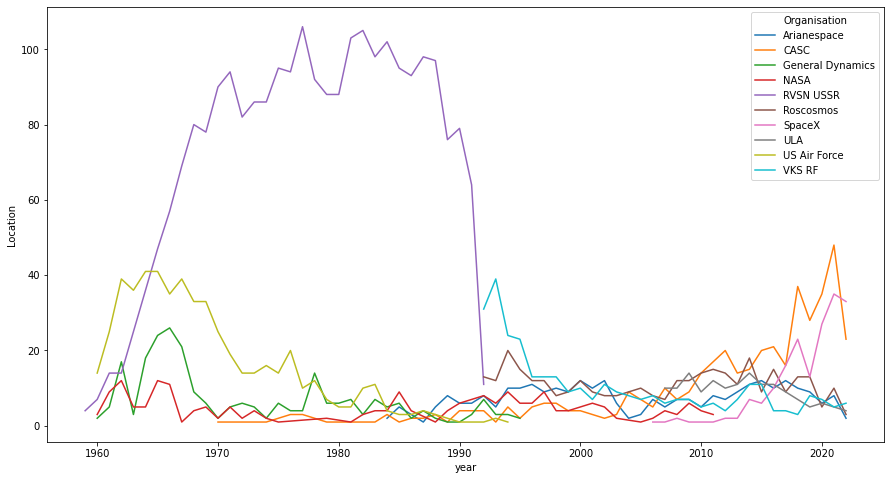

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(ax=ax, x=top_10_data.index.get_level_values("year"), y=top_10_data.Location, hue=top_10_data.index.get_level_values("Organisation"))

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [ ]:
fail_suc = date_cleared_df.groupby(["year", "MissionStatus"]).agg({"Organisation": "count"})
fail_suc

Organisation
year     MissionStatus              
1,959.00 Failure                   5
         Success                   6
1,960.00 Failure                  24
         Success                  12
1,961.00 Failure                  22
...                              ...
2,020.00 Success                 106
2,021.00 Failure                  10
         Success                 143
2,022.00 Failure                   3
         Success                  88

[128 rows x 1 columns]

In [ ]:
percentages = []
for year, new in fail_suc.groupby(level=0):
    percentages.append(round((new.Organisation.values[0]/(new.Organisation.values[0]+new.Organisation.values[1]) * 100), 2))
print(len(percentages))

64


In [ ]:
years = list(set(fail_suc.index.get_level_values("year")))
yearly_failures = pd.DataFrame({"year": years, "failures": percentages})

In [ ]:
px.line(yearly_failures, x="year", y="failures")